In [1]:
#Easy
#Будем анализировать файл train.csv.
#Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту
import pandas as pd
df = pd.read_csv('train.csv')
df.head()
df["Child"] = df["Age"].apply(lambda x: "child" if x < 18 else "adult")
qty = len(df)

child_df = df.query('Age<18')
child_qty = len(child_df)
child_proc = (child_qty/qty)*100
print ('Процент детей среди пассажиров',child_proc,'%')
male_df = df.query('Sex == "male"')
male_qty = len(male_df)
female_df = df.query('Sex == "female"')
female_qty = len(female_df)
female_proc = (female_qty/qty)*100
male_proc = (male_qty/qty)*100
other_proc = 100 - male_proc - female_proc
print ('Процент женщин -',female_proc,'%; процент мужчин -',male_proc,'%; процент остальных - ',other_proc,'%.')

Процент детей среди пассажиров 12.682379349046016 %
Процент женщин - 35.24130190796858 %; процент мужчин - 64.75869809203144 %; процент остальных -  -1.4210854715202004e-14 %.


In [2]:
#Normal
#Посчитать по скольким людям нет информации (пола или возраста)

df1 = df[['PassengerId','Sex','Age']]
df2 = df1.dropna()
qty_emp = qty - len(df2)
print('Нет информации по полу или возрасту по', qty_emp,'пассажирам')

#Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.
surv_df = df.query('Survived ==1')
surv_qty = len(surv_df)
#print(surv_qty)

surv_fem = surv_df[surv_df.Sex == 'female'].PassengerId.count()
surv_fem_proc = (surv_fem/female_qty) * 100
print ('Выжило женщин -',surv_fem_proc,'%.')

surv_mal = surv_df[surv_df.Sex == 'male'].PassengerId.count()
surv_mal_proc = (surv_mal/male_qty) * 100
print ('Выжило мужчин -',surv_mal_proc,'%.')
surv_ch = surv_df[surv_df.Child == 'child'].PassengerId.count()
surv_ch_proc = (surv_ch/child_qty) * 100
print ('Выжило детей -',surv_ch_proc,'%.')

Нет информации по полу или возрасту по 177 пассажирам
Выжило женщин - 74.20382165605095 %.
Выжило мужчин - 18.890814558058924 %.
Выжило детей - 53.98230088495575 %.


      Age  Count
73   0.42      1
74   0.67      1
63   0.75      2
66   0.83      2
85   0.92      1
..    ...    ...
62  70.00      2
81  70.50      1
64  71.00      2
87  74.00      1
77  80.00      1

[88 rows x 2 columns]


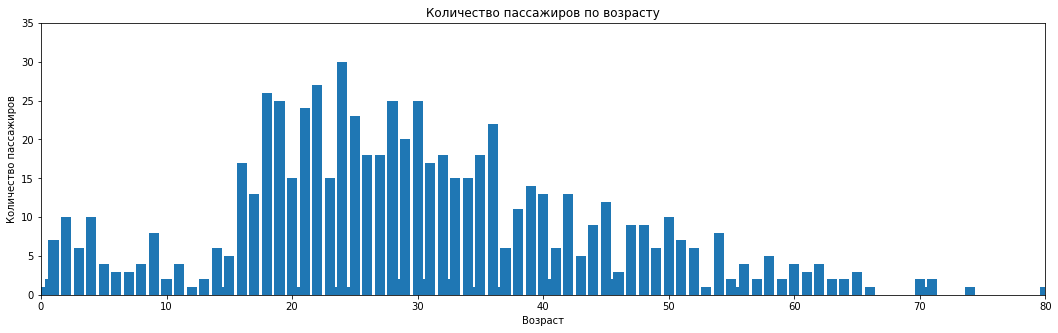

In [28]:
#Вывести гистограмму по возрасту пассажиров
df_age = df['Age'].value_counts().reset_index()
df_age.columns = ['Age', 'Count']
#print (df_age)
df_age_sort = df_age.sort_values(by = ['Age', 'Count'])

print (df_age_sort)

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)
ax.set_xlim([0, 80])
ax.set_ylim([0, 35])
ax.set_title('Количество пассажиров по возрасту')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пассажиров')
x = df_age_sort['Age']
y = df_age_sort['Count']
ax.bar(x, y)
plt.show()


In [5]:
#Посчитать корреляцию между полом и выживаемостью
print ('Корреляция между полом и выживаемостью')
df ['AgeGroup'] = pd.cut (df ['Age'], 8)
df.AgeGroup.value_counts(sort=False)
df.pivot_table(values='Survived',index='AgeGroup',aggfunc=np.mean)

Корреляция между полом и выживаемостью


,Survived
AgeGroup,
"(0.34, 10.368]",0.593750
"(10.368, 20.315]",0.382609
"(20.315, 30.263]",0.365217
"(30.263, 40.21]",0.445161
"(40.21, 50.158]",0.383721
"(50.158, 60.105]",0.404762
"(60.105, 70.052]",0.235294
"(70.052, 80.0]",0.200000


In [6]:
#Посчитать корреляцию между возрастом и выживаемостью
print ('Корреляция между возрастом и выживаемостью')
df.pivot_table(values='Survived',index='Sex',aggfunc=np.mean)

Корреляция между возрастом и выживаемостью


,Survived
Sex,
female,0.742038
male,0.188908


Посчитать корреляцию (методом corr)
ИСПРАВЛЕННОЕ ДЗ

In [17]:
df_corr = df[['Survived','Sex','Age',]]
print(df_corr)
df_corr.corr()

     Survived     Sex   Age
0           0    male  22.0
1           1  female  38.0
2           1  female  26.0
3           1  female  35.0
4           0    male  35.0
..        ...     ...   ...
886         0    male  27.0
887         1  female  19.0
888         0  female   NaN
889         1    male  26.0
890         0    male  32.0

[891 rows x 3 columns]


,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000
